### 调用sklearn包


函数  
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

PCA对象的方法  
fit_transform(X)  
用X来训练PCA模型，同时返回降维后的数据。  
newX=pca.fit_transform(X)，newX就是降维后的数据。  
  
PCA对象的属性  
components_ ：返回具有最大方差的成分。  
explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。  
n_components_：返回所保留的成分个数n。  
mean_：  
noise_variance_：

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
#导入数据
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris.data       #X.shape = (150, 4)

In [4]:
#使用  n_components对应要将的维度
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

##### 查看PCA的一些属性

In [5]:
print(pca.explained_variance_)    # 属性可以查看降维后的每个特征向量上所带的信息量大小（可解释性方差的大小）
print(pca.explained_variance_ratio_)  # 查看降维后的每个新特征的信息量占原始数据总信息量的百分比
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量

[4.22824171 0.24267075]
[0.92461872 0.05306648]
0.977685206318795


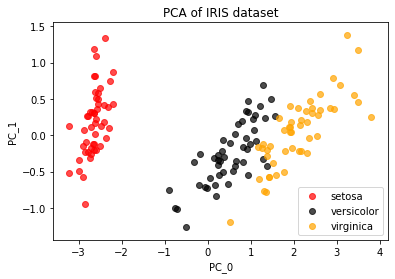

In [6]:
#可视化一下X_new
clors = ['red','black','orange']
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_new[iris.target ==i,0],
                X_new[iris.target==i, 1],
                alpha=0.7,
                c=clors[i],
                label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.show()

第二种画图方法

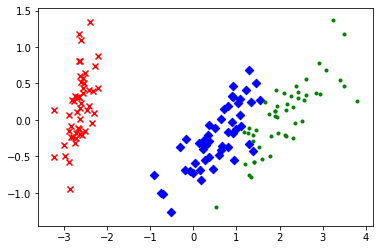

In [7]:
data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()


参数n_components怎么选择

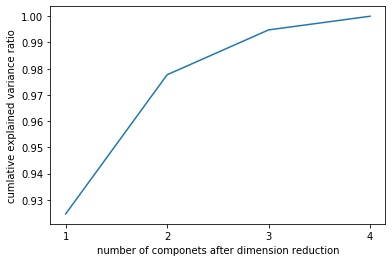

In [8]:
import numpy as np 
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('number of componets after dimension reduction')
plt.ylabel('cumlative explained variance ratio')
plt.show()